Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns



%pip install currencyconverter
from currency_converter import CurrencyConverter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the dataset

In [3]:
# df = pd.read_csv('https://query.data.world/s/4hitawaxckoxcgheh3mdxb5tafsmq6?dws=00000')
df = pd.read_csv('7210_1.csv', low_memory=False)

Copy the dataset for comparing the cleaned and non cleaned

In [47]:
df_cpy = df.copy()

Get the first 10 rows

In [48]:
df_cpy.head(10)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AVpe__JXilAPnD_xSt3F,NaN,Pedi Couture,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-11-10T09:13:23Z,2016-11-10T09:13:23Z,"[{""dateSeen"":[""2016-11-10T09:13:23Z""],""sourceU...",NaN,...,NaN,https://www.walmart.com/ip/PEDI-COUTURE-Women-...,8.396132e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AVpe_0mrilAPnD_xSqI7,NaN,ANNE KLEIN SPORT,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-08-02T08:29:11Z,2016-08-02T08:29:11Z,"[{""dateSeen"":[""2016-08-02T08:29:11Z""],""sourceU...",NaN,...,NaN,http://www.walmart.com/ip/Anne-Klein-Sport-Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AVpe_0mrilAPnD_xSqI7,NaN,ANNE KLEIN SPORT,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-08-02T08:29:11Z,2016-08-02T08:29:11Z,"[{""dateSeen"":[""2016-08-02T08:29:11Z""],""sourceU...",NaN,...,NaN,http://www.walmart.com/ip/Anne-Klein-Sport-Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get the columns

In [49]:
df_cpy.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

Get the info

In [50]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

Describe all the columns

In [51]:
df_cpy.describe(include='all')

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,33801,2422,32817,33801,19844,0.0,33801,33801,28425,1177,...,22135,33801,1.072400e+04,0.0,0.0,1263,0.0,0.0,0.0,1
unique,9996,1245,1360,894,2065,NaN,7006,6506,7186,100,...,3808,9993,NaN,NaN,NaN,69,NaN,NaN,NaN,1
top,AVpfiLB71cnluZ0-mdRy,"B002MUU6JG,B017MXDUZY,B002MUSAQW,B002MUSAQC,B0...",Journee Collection,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Black,NaN,2017-03-28T11:43:08Z,2017-03-28T11:42:28Z,"[{""dateSeen"":[""2017-03-25T09:34:20.165Z""],""sou...",6.0 in x 6.0 in x 1.0 in,...,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,499 g,NaN,NaN,NaN,9 g
freq,79,57,1401,3156,2928,NaN,253,415,67,238,...,79,79,NaN,NaN,NaN,559,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.808845e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.836908e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.151870e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.410790e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.026160e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.865210e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get all the missing values

In [52]:
df_cpy.isna().sum()

id                         0
asins                  31379
brand                    984
categories                 0
colors                 13957
count                  33801
dateAdded                  0
dateUpdated                0
descriptions            5376
dimension              32624
ean                    24023
features                6620
flavors                33801
imageURLs              11492
isbn                   33801
keys                       0
manufacturer           24522
manufacturerNumber      2367
merchants              18419
name                       0
prices.amountMin           0
prices.amountMax           0
prices.availability    33494
prices.color           16380
prices.condition       21786
prices.count           33801
prices.currency            0
prices.dateAdded           0
prices.dateSeen            0
prices.flavor          33801
prices.isSale              0
prices.merchant         3875
prices.offer           27003
prices.returnPolicy    32427
prices.shippin

As we can see, there are a lot of values to be removed, from here we will analyze all the columns with missing values.

First now check the data types of missing datas

In [53]:
df_cpy.loc[:, df_cpy.isna().any(axis=0)].dtypes

asins                   object
brand                   object
colors                  object
count                  float64
descriptions            object
dimension               object
ean                    float64
features                object
flavors                float64
imageURLs               object
isbn                   float64
manufacturer            object
manufacturerNumber      object
merchants               object
prices.availability     object
prices.color            object
prices.condition        object
prices.count           float64
prices.flavor          float64
prices.merchant         object
prices.offer            object
prices.returnPolicy     object
prices.shipping         object
prices.size             object
prices.source          float64
prices.warranty        float64
quantities              object
reviews                 object
sizes                   object
skus                    object
upc                    float64
vin                    float64
websiteI

Check all the columns that the entire rows are null

In [54]:
# get the columns that have all null values
(nulled_col := df_cpy.columns[df_cpy.isnull().all(axis=0)])

Index(['count', 'flavors', 'isbn', 'prices.count', 'prices.flavor',
       'prices.source', 'prices.warranty', 'vin', 'websiteIDs', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

Remove the columns that the entire rows are null

In [55]:
# drop the null columns
df_cpy.drop(nulled_col, axis=1, inplace=True)
df_cpy.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'merchants',
       'name', 'prices.amountMin', 'prices.amountMax', 'prices.availability',
       'prices.color', 'prices.condition', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.sourceURLs', 'quantities',
       'reviews', 'sizes', 'skus', 'sourceURLs', 'upc', 'weight',
       'Unnamed: 51'],
      dtype='object')

The <code>quantities</code> and <code>skus</code> column consists of json formatted strings, therefore we should get the 'value' key

In [56]:
# parse the json string to a python dictionary if it's not NaN
data_qty = df_cpy['quantities'].map(lambda x: json.loads(x) if pd.notnull(x) else x)

for i, v in data_qty.items():
    try:
        if len(v) > 1:
            # get the max value of the list
            v = max(v, key=lambda x: x['value'])['value']
        else:
            v = v[0]['value']
            
        # set the max value to the column
        df_cpy.loc[i, 'quantities'] = v
    except TypeError:
        df_cpy.loc[i, 'quantities'] = np.nan


# set the column to float
df_cpy['quantities'] = df_cpy['quantities'].astype(float)


def d(x):
    if pd.notnull(x):
        try:
            return json.loads(x)
        except json.JSONDecodeError:
            return x
    else:
        return x
    
data_rev = df_cpy['reviews'].map(d)

for i, v in data_rev.items():
    try:
        if len(v) > 1:
            # get the sum rating of the list
            v = sum([x['rating'] for x in v]) / len(v)
        else:
            v = v[0]['rating']
            
        # set the max value to the column
        df_cpy.loc[i, 'reviews'] = v
    except Exception as e:
        df_cpy.loc[i, 'reviews'] = np.nan


# set the column to float
df_cpy['reviews'] = df_cpy['reviews'].astype(float)


Get all the data numerical data types that has missing values

In [57]:
(nulled_num := df_cpy.loc[:, df_cpy.isna().any(axis=0)].select_dtypes(include=['float64', 'int64']).columns)

Index(['ean', 'quantities', 'reviews', 'upc'], dtype='object')

Handle all the missing data for numerical values by using the mean

In [58]:
df_cpy[nulled_num] = df_cpy[nulled_num].fillna(df_cpy[nulled_num].mean())
df_cpy[nulled_num].isna().sum() # check

ean           0
quantities    0
reviews       0
upc           0
dtype: int64

Check all the columns that was 50% of its data are missing

In [59]:
# Check all the columns that was 50% of its data are missing
(nulled_50 := 
 df_cpy.loc[
     :, 
     df_cpy.drop(
        df_cpy.dropna(
            axis=1, 
            thresh=df.shape[0] * 0.50, 
            inplace=False), 
        axis=1)
        .columns].columns)


Index(['asins', 'dimension', 'manufacturer', 'merchants',
       'prices.availability', 'prices.condition', 'prices.offer',
       'prices.returnPolicy', 'prices.shipping', 'prices.size', 'sizes',
       'weight', 'Unnamed: 51'],
      dtype='object')

Remove all the nulled columns and nulled 50% columns

In [60]:
df_cpy.drop(nulled_50, axis=1, inplace=True)
df_cpy.columns

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.color', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.sourceURLs', 'quantities', 'reviews', 'skus', 'sourceURLs',
       'upc'],
      dtype='object')

Check the nulls

In [61]:
df_cpy.isna().sum()

id                        0
brand                   984
categories                0
colors                13957
dateAdded                 0
dateUpdated               0
descriptions           5376
ean                       0
features               6620
imageURLs             11492
keys                      0
manufacturerNumber     2367
name                      0
prices.amountMin          0
prices.amountMax          0
prices.color          16380
prices.currency           0
prices.dateAdded          0
prices.dateSeen           0
prices.isSale             0
prices.merchant        3875
prices.sourceURLs         0
quantities                0
reviews                   0
skus                  11666
sourceURLs                0
upc                       0
dtype: int64

The most important columns are the <code>brand</code>, <code>colors / prices.color</code>, <code>features</code>, and <code>description</code> so clean the rows that does not have values in this columns

In [62]:
# clean the rows that does not have values in columns colors, features and descriptions
prev_shape = df_cpy.shape[0]
df_cpy.dropna(subset=['features', 'descriptions', 'brand'], inplace=True)
print(df_cpy.columns)

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.color', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.sourceURLs', 'quantities', 'reviews', 'skus', 'sourceURLs',
       'upc'],
      dtype='object')


Special case for <code>colors</code> and <code>prices.color</code>

In [63]:
#combine the colors and prices.color

df_cpy['colors'] = df_cpy['colors'].fillna(df_cpy['prices.color'])

# drop the prices.color column
df_cpy.drop('prices.color', axis=1, inplace=True)

# drop the nulls on colors


print(f'{((prev_shape - df_cpy.shape[0]) / prev_shape)*100:.2f}% of the rows were dropped') 
print(df_cpy.columns)

25.88% of the rows were dropped
Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.currency', 'prices.dateAdded', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.sourceURLs', 'quantities',
       'reviews', 'skus', 'sourceURLs', 'upc'],
      dtype='object')


Remove the colors missing values

In [64]:
# remove colors rows with missing values
df_cpy.dropna(subset=['colors'], inplace=True)


In [65]:
df_cpy.isna().sum()

id                       0
brand                    0
categories               0
colors                   0
dateAdded                0
dateUpdated              0
descriptions             0
ean                      0
features                 0
imageURLs             7068
keys                     0
manufacturerNumber     906
name                     0
prices.amountMin         0
prices.amountMax         0
prices.currency          0
prices.dateAdded         0
prices.dateSeen          0
prices.isSale            0
prices.merchant       1252
prices.sourceURLs        0
quantities               0
reviews                  0
skus                  4632
sourceURLs               0
upc                      0
dtype: int64

Remove the remaining columns that has missing values

In [66]:
df_cpy.dropna(axis=1, inplace=True)
df_cpy.isna().sum()

id                   0
brand                0
categories           0
colors               0
dateAdded            0
dateUpdated          0
descriptions         0
ean                  0
features             0
keys                 0
name                 0
prices.amountMin     0
prices.amountMax     0
prices.currency      0
prices.dateAdded     0
prices.dateSeen      0
prices.isSale        0
prices.sourceURLs    0
quantities           0
reviews              0
sourceURLs           0
upc                  0
dtype: int64

Converts the date into epoch

In [67]:
#convert date to epoch
for feature in  ['dateAdded', 'dateUpdated', 'prices.dateAdded', 'prices.dateSeen']:
    df_cpy[feature] = pd.to_datetime(df_cpy[feature], errors='coerce')
    
    
    # if the value is not NaN, convert to epoch using lambda
    df_cpy[feature] = df_cpy[feature].map(lambda x: x if pd.isnull(x) else int(x.toordinal()))



Change the price currency into PHP

In [68]:
curs = {}
# get all the currency
for x in df_cpy['prices.currency'].unique():
    curs[x] = CurrencyConverter().convert(1, x, 'PHP')

# convert all the prices to PHP  
for x in curs.keys():
    df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMax'] = df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMax'].map(lambda y: y * curs[x])  
    df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMin'] = df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMin'].map(lambda y: y * curs[x])

# drop the prices.currency column (as all values will be converted to PHP)
df_cpy.drop('prices.currency', axis=1, inplace=True)


In [69]:
df_cpy['prices.amount'] = df_cpy[['prices.amountMax', 'prices.amountMin']].mean(axis=1)

In [70]:
df_cpy['colors'] = df_cpy['colors'].map(lambda x: x.lower())

for i, v in df_cpy['colors'].items():
    # non color values
    if 'women' in v:
        # remove the row
        df_cpy.drop(i, inplace=True)

In [71]:
df_cpy['colors'].unique()

array(['purple', 'multicolor,multi', 'silver', ...,
       'beige,black,blue,grey,red', 'black,green,red', 'black,red,yellow'],
      dtype=object)

Normalize data

In [72]:
# normalize the data numerical only
df_cpy_norm = df_cpy.select_dtypes(include=['float64', 'int64']).apply(lambda x: x  / x.max())
df_cpy_norm = pd.concat([df_cpy_norm, df_cpy.select_dtypes(exclude=['float64', 'int64'])], axis=1)
df_cpy_norm.head()

,dateAdded,dateUpdated,ean,prices.amountMin,prices.amountMax,prices.dateAdded,quantities,reviews,upc,prices.amount,...,categories,colors,descriptions,features,keys,name,prices.dateSeen,prices.isSale,prices.sourceURLs,sourceURLs
0,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,1.0,0.747789,0.063307,...,"Access.,Clothing,Shoes,Women's Clothing",purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
1,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,1.0,0.747789,0.063307,...,"Access.,Clothing,Shoes,Women's Clothing",purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
2,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,1.0,0.747789,0.063307,...,"Access.,Clothing,Shoes,Women's Clothing",purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
3,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,1.0,0.747789,0.063307,...,"Access.,Clothing,Shoes,Women's Clothing",purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
4,0.999928,0.999978,0.079394,0.063307,0.063307,0.999943,0.15,1.0,0.747789,0.063307,...,"Access.,Clothing,Shoes,Women's Clothing",purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736368,True,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...


<h2>Correlation</h2>

In [103]:
df_cpy_norm.corr(numeric_only=True)

,dateAdded,dateUpdated,ean,prices.amountMin,prices.amountMax,prices.dateAdded,quantities,reviews,upc,prices.amount,prices.isSale
dateAdded,1.000000,-0.053180,-0.037017,0.013990,0.005852,0.285814,-0.147728,0.024012,-0.031892,0.009923,0.073652
dateUpdated,-0.053180,1.000000,-0.047874,0.015150,0.015927,0.405946,-0.104826,0.001465,-0.058916,0.015561,-0.389313
ean,-0.037017,-0.047874,1.000000,0.079633,0.079676,-0.025708,0.016186,0.014455,0.843966,0.079765,0.007241
prices.amountMin,0.013990,0.015150,0.079633,1.000000,0.994469,-0.011669,0.005556,-0.006538,0.083156,0.998608,-0.152795
prices.amountMax,0.005852,0.015927,0.079676,0.994469,1.000000,-0.026360,0.007201,-0.005902,0.083119,0.998624,-0.153160
prices.dateAdded,0.285814,0.405946,-0.025708,-0.011669,-0.026360,1.000000,-0.002679,-0.007519,-0.027141,-0.019062,-0.196035
quantities,-0.147728,-0.104826,0.016186,0.005556,0.007201,-0.002679,1.000000,-0.019580,0.020680,0.006390,0.032594
reviews,0.024012,0.001465,0.014455,-0.006538,-0.005902,-0.007519,-0.019580,1.000000,0.016977,-0.006227,0.015341
upc,-0.031892,-0.058916,0.843966,0.083156,0.083119,-0.027141,0.020680,0.016977,1.000000,0.083253,0.012145
prices.amount,0.009923,0.015561,0.079765,0.998608,0.998624,-0.019062,0.006390,-0.006227,0.083253,1.000000,-0.153190


(0.0, 1.0499502512562815)

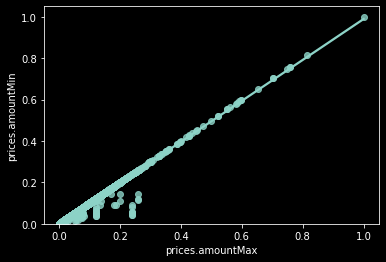

In [74]:
sns.regplot(x='prices.amountMax', y='prices.amountMin', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 1.0508136601976787)

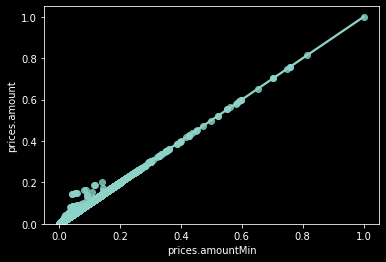

In [75]:
sns.regplot(x='prices.amountMin', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 1.0499502512562815)

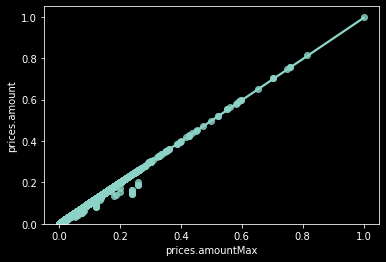

In [76]:
sns.regplot(x='prices.amountMax', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 58487.95545965702)

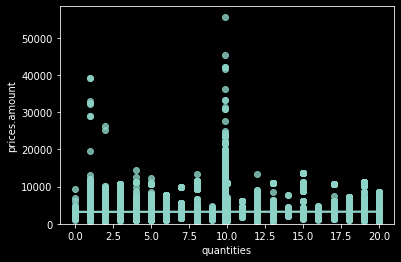

In [104]:
sns.regplot(x='quantities', y='prices.amount', data=df_cpy)
plt.ylim(0,)


In [115]:
sns.regplot(x='prices.dateAdded', y='prices.amountMax', data=df_cpy)
plt.ylim(0,)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U20'), dtype('float64')) -> None

Error in callback <function _draw_all_if_interactive at 0x000001F4353C40D0> (for post_execute):


KeyboardInterrupt: 

(0.0, 58487.95545965702)

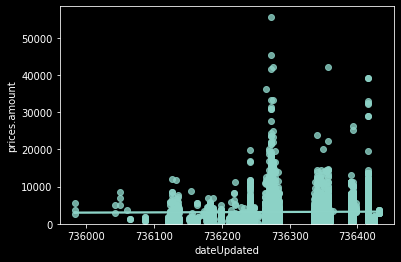

In [106]:
sns.regplot(x='dateUpdated', y='prices.amount', data=df_cpy)
plt.ylim(0,)

(0.0, 58487.95545965702)

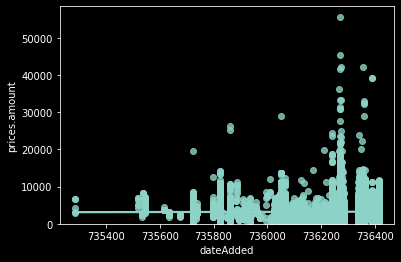

In [107]:
sns.regplot(x='dateAdded', y='prices.amount', data=df_cpy)
plt.ylim(0,)

(0.0, 58487.95545965702)

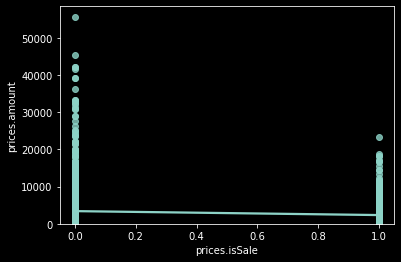

In [108]:
sns.regplot(x='prices.isSale', y='prices.amount', data=df_cpy)
plt.ylim(0,)

(0.0, 58487.95545965702)

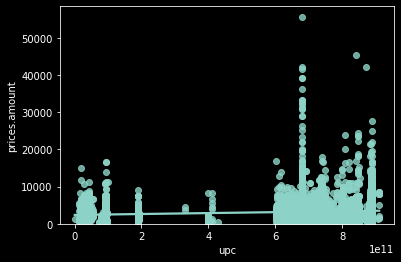

In [109]:
sns.regplot(x='upc', y='prices.amount', data=df_cpy)
plt.ylim(0,)

(0.0, 58487.95545965702)

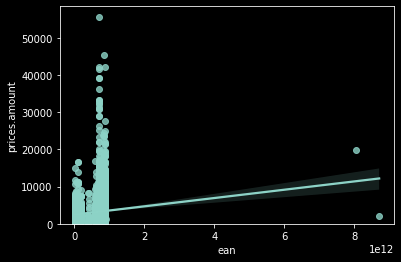

In [110]:
sns.regplot(x='ean', y='prices.amount', data=df_cpy)
plt.ylim(0,)

(0.0, 58487.95545965702)

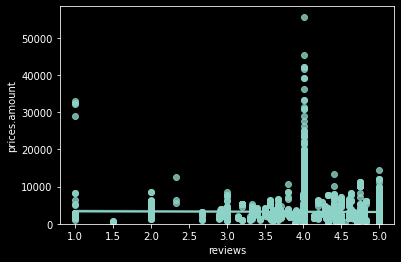

In [114]:
sns.regplot(x='reviews', y='prices.amount', data=df_cpy)
plt.ylim(0,)


In [85]:
df_cpy_norm.select_dtypes(exclude=['float64', 'int64']).columns

Index(['id', 'brand', 'categories', 'colors', 'descriptions', 'features',
       'keys', 'name', 'prices.dateSeen', 'prices.isSale', 'prices.sourceURLs',
       'sourceURLs'],
      dtype='object')

Top 20 brands

<AxesSubplot: xlabel='count', ylabel='brand'>

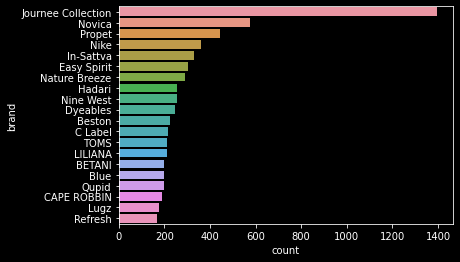

In [86]:
#show only top brands
sns.countplot(y='brand', data=df_cpy_norm, order=df_cpy_norm['brand'].value_counts().iloc[:20].index)

<AxesSubplot: xlabel='brand', ylabel='prices.amount'>

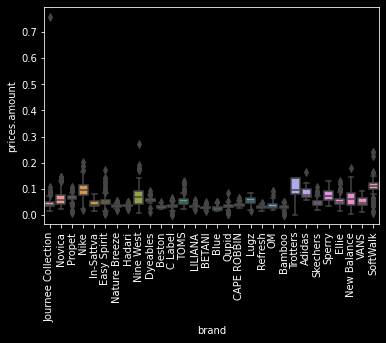

In [87]:
plt.xticks(rotation=90)
sns.boxplot(x='brand', y='prices.amount', data=df_cpy_norm, order=df_cpy_norm['brand'].value_counts().iloc[:30].index)

In [88]:
df_cpy_norm['brand'].unique()

array(['Novica', 'BEAUTIFEET', 'Caparros', 'Lugz', 'Vince Camuto',
       'Bloch', 'Wild Diva', 'SKECHERS', 'Faded Glory', 'JBU by Jambu',
       'Style & Co.', 'Arizona Jean Company', 'Ellen Tracy', 'Mia Girl',
       'Born', 'r.b.l.s.', 'Michael Kors', 'Giani Bernini', 'Iron Fist',
       'Lillian Rose', 'Dyeables', 'Alfani', 'MUK LUKS', 'BareTraps',
       'Dr. Weil', 'Franco Sarto', 'Sanita', 'PleaserUSA', 'Easy Spirit',
       'PUMA', 'Reebok', 'Crocs', 'kate spade', 'White Mountain',
       'Journee Collection', 'Giro', 'G BY GUESS', 'Indigo Rd.',
       'ELLIE SHOES', 'Ellie', 'Touch Ups', 'Propet',
       'MICHAEL Michael Kors', 'Michael Michael Kors',
       'Lamo Sheepskin Inc', 'Nina', 'New Balance', 'Pleaser USA, Inc.',
       'DF by Dearfoams', 'Badgley Mischka', 'Toms', 'Mia', 'TOMS',
       'Tredsafe', '2 Lips Too', 'Aerosoles', 'Vans', 'Karen Scott',
       'Oofos', 'Tenth Frame', 'The Flexx', 'FS/NY', 'VANS', 'Rampage',
       'Forever Collectible', 'Gentle Souls', 'Th

In [89]:
df_grouped = df_cpy_norm[['brand', 'prices.amount']].groupby(['brand'])

e = {}
for b in df_cpy_norm['brand'].unique():
    e[b] = df_grouped.get_group(b)['prices.amount']

f_value, p_value = stats.f_oneway(*e.values())
print("ANOVA results: F=", f_value, ", P =", p_value)

ANOVA results: F= 43.027825653350035 , P = 0.0


Top 20 colors

<AxesSubplot: xlabel='count', ylabel='colors'>

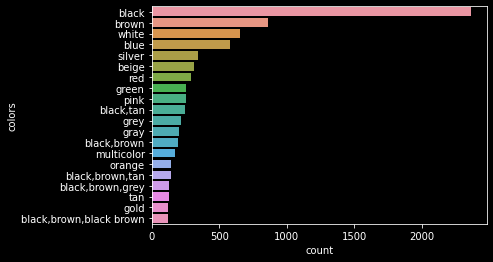

In [90]:
#show only top colors
sns.countplot(y='colors', data=df_cpy_norm, order=df_cpy_norm['colors'].value_counts().iloc[:20].index)

<AxesSubplot: xlabel='colors', ylabel='prices.amount'>

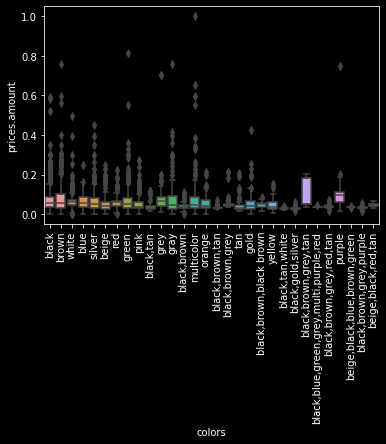

In [91]:
plt.xticks(rotation=90)
sns.boxplot(x='colors', y='prices.amount', data=df_cpy_norm, order=df_cpy_norm['colors'].value_counts().iloc[:30].index)

IsSale

<AxesSubplot: xlabel='prices.isSale', ylabel='prices.amount'>

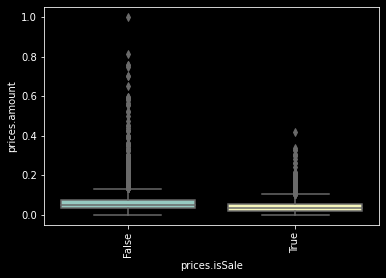

In [92]:
plt.xticks(rotation=90)
sns.boxplot(x='prices.isSale', y='prices.amount', data=df_cpy_norm)

In [93]:
df_cpy_norm.describe()

,dateAdded,dateUpdated,ean,prices.amountMin,prices.amountMax,prices.dateAdded,quantities,reviews,upc,prices.amount
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000
mean,0.999664,0.999908,0.078954,0.057877,0.058130,0.999857,0.452668,0.802490,0.746200,0.058003
std,0.000307,0.000090,0.021316,0.046611,0.046883,0.000195,0.298302,0.063342,0.191007,0.046682
min,0.998463,0.999390,0.001483,0.000995,0.000995,0.998441,0.000000,0.200000,0.000910,0.000995
25%,0.999498,0.999792,0.079394,0.031749,0.031892,0.999784,0.150000,0.803593,0.747789,0.031784
50%,0.999804,0.999948,0.079394,0.045216,0.045216,0.999978,0.492501,0.803593,0.747789,0.045216
75%,0.999920,0.999978,0.079394,0.070302,0.070302,0.999978,0.500000,0.803593,0.769557,0.070302
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
df_cpy_norm.describe(include=['object'])

,id,brand,categories,colors,descriptions,features,keys,name,prices.dateSeen,prices.sourceURLs,sourceURLs
count,16450,16450,16450,16450,16450,16450,16450,16450,16194,16450,16450
unique,3932,758,476,1459,3932,3916,3928,3825,327,5886,3932
top,AVqP4tLYQMlgsOJE6dfJ,Journee Collection,"Shoes,Women's Shoes,Clothing,All Women's Shoes",black,"[{""dateSeen"":[""2017-03-25T09:34:20.165Z""],""sou...","[{""key"":""Heel Height"",""value"":[""High Heel""]},{...","lilianawomensef63velvetpompomheels/20669369,li...",Women's Easy Spirit Traveltime Light Natural/W...,736413,https://www.overstock.com/Clothing-Shoes/Lilia...,https://www.overstock.com/Clothing-Shoes/Lilia...
freq,67,1397,1541,2361,67,67,67,130,7821,67,67


In [95]:
df_group = df_cpy[['brand', 'colors', 'prices.amount']]

group_test = df_group.groupby(['brand', 'colors'], as_index=False).mean(['prices.amount'])
group_test

,brand,colors,prices.amount
0,1 World Sarongs,"black,blue,brown",855.736548
1,1 World Sarongs,"black,purple,white",1185.397132
2,1 World Sarongs,blue,992.714113
3,1 World Sarongs,"other,pink,white,yellow",917.600394
4,1 World Sarongs,white,1412.111266
...,...,...,...
2892,mobils by Mephisto,"denim leather,steel leather",14553.399775
2893,new@titude,brown,958.259776
2894,r.b.l.s.,black,1455.246669
2895,summitfashions,green,3217.199916


In [96]:
group_pivot = group_test.pivot(index='colors', columns='brand')
group_pivot


prices.amount                                             \
brand             1 World Sarongs 2 Lips Too 90 Degree by Reflex A'rcopedico   
colors                                                                         
,                             NaN        NaN                 NaN         NaN   
10                            NaN        NaN                 NaN         NaN   
5                             NaN        NaN                 NaN         NaN   
5.5                           NaN        NaN                 NaN         NaN   
6                             NaN        NaN                 NaN         NaN   
...                           ...        ...                 ...         ...   
yellow                        NaN        NaN                 NaN         NaN   
yellow,cornsilk               NaN        NaN                 NaN         NaN   
yellow,lt yllw                NaN        NaN                 NaN         NaN   
zebra,of                      NaN        NaN                 NaN         NaN   
zig zag,coral pat             NaN        NaN                 NaN         NaN   

                                                                           \
brand             A2 By Aerosoles A2 by Aerosoles ADI ASICS Academie Gear   
colors                                                                      
,                             NaN             NaN NaN   NaN           NaN   
10                            NaN             NaN NaN   NaN           NaN   
5                             NaN             NaN NaN   NaN           NaN   
5.5                           NaN             NaN NaN   NaN           NaN   
6                             NaN             NaN NaN   NaN           NaN   
...                           ...             ...  ..   ...           ...   
yellow                        NaN             NaN NaN   NaN           NaN   
yellow,cornsilk               NaN             NaN NaN   NaN           NaN   
yellow,lt yllw                NaN             NaN NaN   NaN           NaN   
zebra,of                      NaN             NaN NaN   NaN           NaN   
zig zag,coral pat             NaN             NaN NaN   NaN           NaN   

                         ...                                             \
brand             Acorn  ... a.x.n.y. bar III eighty4 flojos kate spade   
colors                   ...                                              
,                   NaN  ...      NaN     NaN     NaN    NaN        NaN   
10                  NaN  ...      NaN     NaN     NaN    NaN        NaN   
5                   NaN  ...      NaN     NaN     NaN    NaN        NaN   
5.5                 NaN  ...      NaN     NaN     NaN    NaN        NaN   
6                   NaN  ...      NaN     NaN     NaN    NaN        NaN   
...                 ...  ...      ...     ...     ...    ...        ...   
yellow              NaN  ...      NaN     NaN     NaN    NaN        NaN   
yellow,cornsilk     NaN  ...      NaN     NaN     NaN    NaN        NaN   
yellow,lt yllw      NaN  ...      NaN     NaN     NaN    NaN        NaN   
zebra,of            NaN  ...      NaN     NaN     NaN    NaN        NaN   
zig zag,coral pat   NaN  ...      NaN     NaN     NaN    NaN        NaN   

                                                                               
brand             mobils by Mephisto new@titude r.b.l.s. summitfashions totes  
colors                                                                         
,                                NaN        NaN      NaN            NaN   NaN  
10                               NaN        NaN      NaN            NaN   NaN  
5                                NaN        NaN      NaN            NaN   NaN  
5.5                              NaN        NaN      NaN            NaN   NaN  
6                                NaN        NaN      NaN            NaN   NaN  
...                              ...        ...      ...            ...   ...  
yellow                           NaN        NaN  

In [98]:
df_cpy_norm.columns

Index(['dateAdded', 'dateUpdated', 'ean', 'prices.amountMin',
       'prices.amountMax', 'prices.dateAdded', 'quantities', 'reviews', 'upc',
       'prices.amount', 'id', 'brand', 'categories', 'colors', 'descriptions',
       'features', 'keys', 'name', 'prices.dateSeen', 'prices.isSale',
       'prices.sourceURLs', 'sourceURLs'],
      dtype='object')

[]

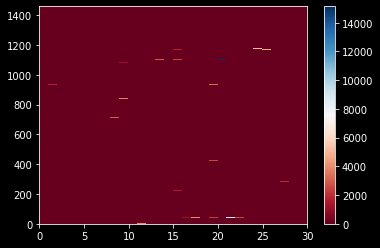

In [97]:
group_pivot_top30 = group_pivot.iloc[:, :30]

plt.pcolor(group_pivot_top30.fillna(0), cmap='RdBu')
plt.colorbar()
plt.plot()

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
33794    0.803593
33795    0.803593
33796    0.803593
33797    0.803593
33798    0.803593
Name: reviews, Length: 16450, dtype: float64